In [1]:
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

%matplotlib inline
pd.options.mode.chained_assignment = None

train = pd.read_csv("Titanic/train.csv")
test = pd.read_csv("Titanic/test.csv")

In [2]:
data = train.append(test, ignore_index = True)
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [4]:
data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

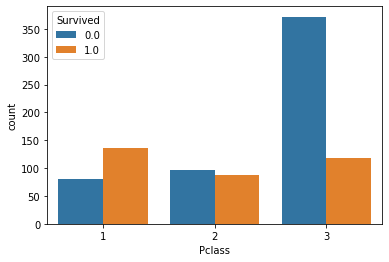

In [6]:
sns.countplot(data['Pclass'], hue=data['Survived'])

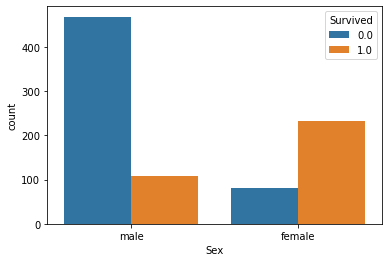

In [7]:
sns.countplot(data['Sex'], hue=data['Survived'])

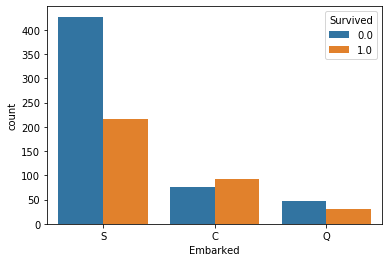

In [8]:
sns.countplot(data['Embarked'], hue=data['Survived'])

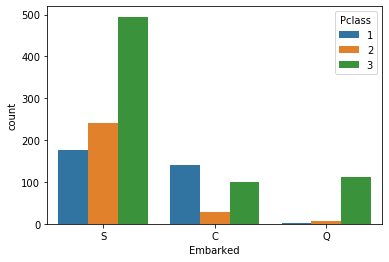

In [9]:
sns.countplot(data['Embarked'], hue=data['Pclass']) 

In [10]:
data[['Pclass', 'Fare']].groupby(['Pclass']).mean()

,Fare
Pclass,
1,87.508992
2,21.179196
3,13.302889


In [11]:
data[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


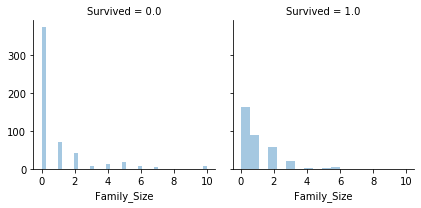

In [12]:
data['Family_Size'] = data['Parch'] + data['SibSp']

g = sns.FacetGrid(data, col = 'Survived')
g.map(sns.distplot, 'Family_Size', kde = False)

In [13]:
def bar_chart(feature):
    survived = data[data['Survived']==1][feature].value_counts()
    dead = data[data['Survived']==0][feature].value_counts()
    df2 = pd.DataFrame([survived,dead])
    df2.index = ['Survived','Dead']
    df2.plot(kind='bar', stacked=True, figsize = (10,5))

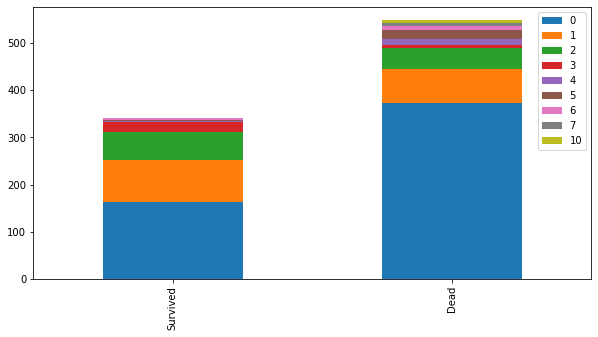

In [14]:
bar_chart('Family_Size')

In [15]:
data['Family_Size'].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: Family_Size, dtype: int64

In [16]:
data['Family_Size'] = data['Family_Size'].map(lambda x: 5 if x > 4 else x)
#Correlacion y media de familiariees que sobrevivieron por cantidad de familiares
data[['Family_Size', 'Survived']].groupby(['Family_Size']).mean()

,Survived
Family_Size,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.148936


In [17]:
data['Family_Size'].value_counts()

0    790
1    235
2    159
5     60
3     43
4     22
Name: Family_Size, dtype: int64

In [18]:
data['Title'] = data['Name'].map( lambda x: x.split(',')[1].split( '.' )[0].strip())
data['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Don               1
Lady              1
Mme               1
the Countess      1
Sir               1
Jonkheer          1
Capt              1
Dona              1
Name: Title, dtype: int64

In [19]:
data['Title']  = data['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady',
                                         'the Countess','Jonkheer','Col','Rev',
                                         'Capt','Sir','Don','Dona'],
                                        ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs',
                                         'Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])

data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [20]:
data.groupby('Title')['Age'].mean()

Title
Master     5.482642
Miss      21.824366
Mr        32.811056
Mrs       36.971264
Name: Age, dtype: float64

In [21]:
data.groupby(['Title','Pclass'])['Age'].mean()

Title   Pclass
Master  1          6.984000
        2          2.757273
        3          6.090000
Miss    1         30.131148
        2         20.865714
        3         17.360874
Mr      1         42.241497
        2         32.914966
        3         28.318910
Mrs     1         42.802817
        2         33.518519
        3         32.326531
Name: Age, dtype: float64

In [22]:
data[['Title', 'Survived']].groupby(['Title']).mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.161710
Mrs,0.796875


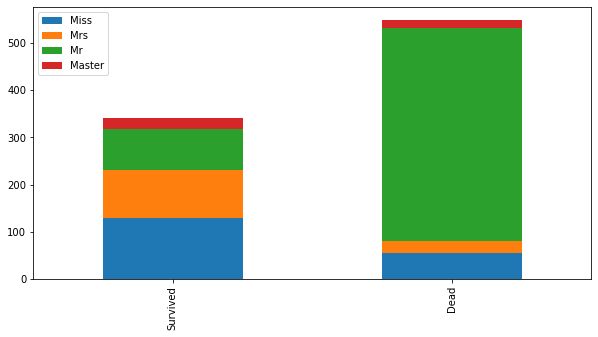

In [23]:
bar_chart('Title')

In [24]:
data['Fare-intervalo'] = pd.qcut(data['Fare'],5,labels = [1,2,3,4,5])  #cut Fare into 5 parts

data[['Fare-intervalo', 'Survived']].groupby(['Fare-intervalo']).mean()

,Survived
Fare-intervalo,
1,0.217877
2,0.201087
3,0.424419
4,0.445652
5,0.645349


In [25]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Title,Fare-intervalo
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,Mrs,5
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,Miss,2
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,Mrs,5
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,Mr,2


In [26]:
data['Ticket'] = data['Ticket'].map(lambda x: x[0])
data[['Ticket', 'Survived']].groupby(['Ticket']).mean()

,Survived
Ticket,
1,0.630137
2,0.464481
3,0.239203
4,0.200000
5,0.000000
6,0.166667
7,0.111111
8,0.000000
9,1.000000


In [27]:
data[data.index == 829]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Title,Fare-intervalo
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,1,0,Mrs,5


In [28]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [29]:
data['Fare-intervalo'] = data['Fare-intervalo'].fillna(3)

In [30]:
data['Embarked'] = data['Embarked'].fillna("S")

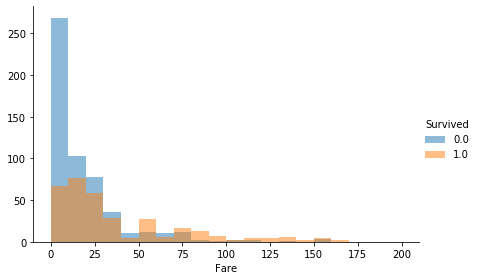

In [31]:
g = sns.FacetGrid(data, hue = 'Survived', size = 4, aspect = 1.5)
g.map(plt.hist, 'Fare', alpha = .5, bins = range(0,210,10))
g.add_legend()
plt.show()

In [32]:
data["Cabin"] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')
data["Cabin"].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

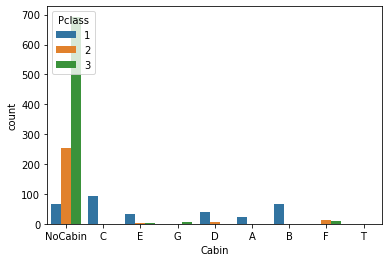

In [33]:
sns.countplot(data['Cabin'], hue = data['Pclass']) 

In [34]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Title,Fare-intervalo
0,22.0,NoCabin,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A,1,Mr,1
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,P,1,Mrs,5
2,26.0,NoCabin,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,S,0,Miss,2
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,1,1,Mrs,5
4,35.0,NoCabin,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,3,0,Mr,2


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
Age               1046 non-null float64
Cabin             1309 non-null object
Embarked          1309 non-null object
Fare              1309 non-null float64
Name              1309 non-null object
Parch             1309 non-null int64
PassengerId       1309 non-null int64
Pclass            1309 non-null int64
Sex               1309 non-null object
SibSp             1309 non-null int64
Survived          891 non-null float64
Ticket            1309 non-null object
Family_Size       1309 non-null int64
Title             1309 non-null object
Fare-intervalo    1309 non-null category
dtypes: category(1), float64(3), int64(5), object(6)
memory usage: 144.7+ KB


In [36]:
data['Sex'] = data['Sex'].astype('category').cat.codes
data['Embarked'] = data['Embarked'].astype('category').cat.codes
data['Pclass'] = data['Pclass'].astype('category').cat.codes
data['Title'] = data['Title'].astype('category').cat.codes
data['Name'] = data['Name'].astype('category').cat.codes
data['Cabin'] = data['Cabin'].astype('category').cat.codes
data['Ticket'] = data['Ticket'].astype('category').cat.codes

dataAgeNull = data[data["Age"].isnull()]
dataAgeNotNull = data[data["Age"].notnull()]

remove_outlier = dataAgeNotNull[(np.abs(dataAgeNotNull["Fare"]-dataAgeNotNull["Fare"].mean())>(4*dataAgeNotNull["Fare"].std()))|(np.abs(dataAgeNotNull["Family_Size"]-dataAgeNotNull["Family_Size"].mean())>(4*dataAgeNotNull["Family_Size"].std()))]
rfModel_age = RandomForestRegressor(n_estimators=2000,random_state=42)
ageColumns = ['Embarked', 'Fare-intervalo', 'Pclass', 'Sex', 'Family_Size', 'Title','Cabin','Ticket']
rfModel_age.fit(remove_outlier[ageColumns], remove_outlier["Age"])
rfModel_age.score(remove_outlier[ageColumns], remove_outlier["Age"])

0.7042825966015437

In [ ]:
knn = KNeighborsClassifier()

In [37]:
from sklearn.linear_model import Ridge

clf_R = Ridge(alpha = .1)
clf_R.fit(remove_outlier[ageColumns], remove_outlier["Age"])
clf_R.score(remove_outlier[ageColumns], remove_outlier["Age"])

0.5969229427878291

In [38]:
from sklearn.linear_model import Lasso

clf_L = Lasso(alpha = .1)
clf_L.fit(remove_outlier[ageColumns], remove_outlier["Age"])
clf_L.score(remove_outlier[ageColumns], remove_outlier["Age"])

0.5966819011936084

In [39]:
from vecstack import stacking

models = [clf_R, clf_L, rfModel_age]
S_train, S_test = stacking(models,
                          remove_outlier[ageColumns], remove_outlier["Age"], dataAgeNull[ageColumns],
                           regression=True,
                           mode='oof_pred_bag',
                           n_folds=5,
                           random_state=42,
                           verbose=2)

task:         [regression]
metric:       [mean_absolute_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [Ridge]
    fold  0:  [14.50362957]
    fold  1:  [14.27699650]
    fold  2:  [9.33681097]
    fold  3:  [8.81203518]
    fold  4:  [14.07876854]
    ----
    MEAN:     [12.20164815] + [2.56228564]
    FULL:     [12.45913814]

model  1:     [Lasso]
    fold  0:  [14.44715467]
    fold  1:  [14.02482918]
    fold  2:  [9.34850710]
    fold  3:  [8.36541568]
    fold  4:  [14.09993647]
    ----
    MEAN:     [12.05716862] + [2.63524226]
    FULL:     [12.31350077]

model  2:     [RandomForestRegressor]
    fold  0:  [13.55117500]
    fold  1:  [16.07949524]
    fold  2:  [4.80872679]
    fold  3:  [11.29458829]
    fold  4:  [17.16540675]
    ----
    MEAN:     [12.57987841] + [4.38772318]
    FULL:     [12.84287332]



In [40]:
rfModel_age2 = RandomForestRegressor(n_estimators=2000, random_state=42)
rfModel_age2.fit(S_train, remove_outlier["Age"])
ageNullValues = rfModel_age2.predict(S_test)

dataAgeNull.loc[0:,"Age"] = ageNullValues
data = dataAgeNull.append(dataAgeNotNull)
data.reset_index(inplace=True, drop=True)

In [41]:
rfModel_age2.score(S_train, remove_outlier["Age"])

0.9114476845830679

In [42]:
dataTrain = data[pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])
dataTest = data[~pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])

dataTrain.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Family_Size', 'Title',
       'Fare-intervalo'],
      dtype='object')

In [43]:
dataTrain = dataTrain[['Survived', 'Age', 'Embarked', 'Fare-intervalo',  'Pclass', 'Sex', 
                       'Family_Size', 'Title','Ticket','Cabin']]

dataTest = dataTest[['Age', 'Embarked', 'Fare-intervalo', 'Pclass', 'Sex', 'Family_Size', 
                     'Title','Ticket','Cabin']]

In [44]:
dataTrain.applymap(lambda x: int(x))

,Survived,Age,Embarked,Fare-intervalo,Pclass,Sex,Family_Size,Title,Ticket,Cabin
263,0,22,2,1,2,1,1,2,9,7
264,1,38,0,5,0,0,1,3,13,2
265,1,26,2,2,2,0,0,1,14,7
266,1,35,2,5,0,0,1,3,0,2
267,0,35,2,2,2,1,0,2,2,7
0,0,54,1,2,2,1,0,2,2,7
268,0,54,2,5,0,1,0,2,0,4
269,0,2,2,3,2,1,4,0,2,7
270,1,27,2,3,2,0,2,3,2,7
271,1,14,0,4,1,0,1,3,1,7


In [45]:
from sklearn.ensemble import RandomForestClassifier
 
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=2000,
                             min_samples_split=12,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1) 

train = dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0]
rf.fit(*train)
print("%.4f" % rf.oob_score_)

0.8272


In [ ]:
test = 

In [52]:
import lightgbm

fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [test],
            'eval_names': ['valid'],
            'verbose': 100,}

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 100

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=2,
    refit=True,
    random_state=314,
    verbose=True)

gs.fit(*train, **fit_params)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: too many values to unpack (expected 2)

In [ ]:
boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    subsample_for_bin=200000,
    objective=None,
    class_weight=None,
    min_split_gain=0.0,
    min_child_weight=0.001,
    min_child_samples=20,
    subsample=1.0,
    subsample_freq=0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=None,
    n_jobs=-1,
    silent=True,
    importance_type='split',
    **kwargs,

In [49]:
cf_lgbm = lightgbm.LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.7792703648870174, importance_type='split',
        learning_rate=0.1, max_depth=-1, metric='None',
        min_child_samples=344, min_child_weight=0.01, min_split_gain=0.0,
        n_estimators=5000, n_jobs=4, num_leaves=10, objective=None,
        random_state=314, reg_alpha=0, reg_lambda=10, silent=True,
        subsample=0.8503048560728566, subsample_for_bin=200000,
        subsample_freq=0)

cf_lgbm.fit(*train, **fit_params)
print("%.4f" % cf_lgbm.oob_score_)

ValueError: too many values to unpack (expected 2)

In [46]:
pd.concat((pd.DataFrame(dataTrain.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
4,Sex,0.280488
6,Title,0.155573
0,Age,0.150919
3,Pclass,0.093759
5,Family_Size,0.075689
7,Ticket,0.073410
8,Cabin,0.072245
2,Fare-intervalo,0.071379
1,Embarked,0.026539


In [47]:
submit = pd.read_csv('Titanic/gender_submission.csv')

rf_res =  rf.predict(dataTest)
submit['Survived'] = rf_res
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('submit.csv', index= False)

submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
